# Classifiers

In [1]:
# Important packages
import pandas as pd
import numpy as np
import ta
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, chi2

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [2]:
df = pd.read_parquet('../Dataframes/df.parquet.gzip')

In [3]:
# Make date the index
df.index = df["date"]
df.drop(["date"], axis=1, inplace=True)

In [6]:
df.head()

,open,high,low,close,wclose,so_3,so_4,so_5,so_8,so_9,...,hi_avg_2,lo_avg_2,hilo_avg_2,hilo_avg,slope_3,slope_4,slope_5,slope_10,slope_20,slope_30
date,,,,,,,,,,,,,,,,,,,,,
11/2/2000,1.6087,1.6104,1.5879,1.5927,1.595925,16.326531,16.326531,16.326531,27.218935,26.900585,...,1.61380,1.59660,1.605200,1.59915,141.857175,183.609406,224.795834,47.024049,-580.628944,-558.700648
14/2/2000,1.5927,1.5971,1.5860,1.5873,1.589425,4.166667,4.153355,4.153355,11.242604,11.242604,...,1.60375,1.58695,1.595350,1.59155,123.669380,146.514411,172.781294,252.413836,-379.571709,-528.186512
15/2/2000,1.5873,1.5976,1.5851,1.5960,1.593675,43.083004,33.956386,33.850932,36.982249,36.982249,...,1.59735,1.58555,1.591450,1.59135,191.458027,144.278393,157.105210,266.956749,-81.647095,-483.338404
16/2/2000,1.5960,1.6100,1.5946,1.6072,1.604750,88.755020,87.351779,68.847352,68.633540,70.118343,...,1.60380,1.58985,1.596825,1.60230,-107.547908,37.248993,132.796436,273.808202,136.045358,-474.973133
17/2/2000,1.6072,1.6138,1.6027,1.6083,1.608275,80.836237,80.836237,80.836237,72.049689,72.049689,...,1.61190,1.59865,1.605275,1.60825,-68.693550,-67.738396,101.820193,273.911976,330.800262,-430.288438


In [5]:
# Make df['delta'] the expected output
target = df['delta']
df.drop(['delta'], axis = 1, inplace = True)

In [8]:
# Features
feat_labels = ['open', 'high', 'low', 'close', 'wclose', 'so_3', 'so_4', 'so_5',
       'so_8', 'so_9', 'so_10', 'wr_6', 'wr_7', 'wr_8', 'wr_9', 'wr_10',
       'roc_12', 'roc_13', 'roc_14', 'roc_15', 'wcp_15', 'macd_15_30',
       'cci_15', 'hi_avg_2', 'lo_avg_2', 'hilo_avg_2', 'hilo_avg', 'slope_3',
       'slope_4', 'slope_5', 'slope_10', 'slope_20', 'slope_30']

## Random Forest Classifier

#### All features

In [7]:
# Train and Test samples
train_size = int(len(df) * 0.7)
X_train, X_test = df[:train_size], df[train_size:]
y_train, y_test = target[:train_size], target[train_size:]

rf_model = RandomForestClassifier(n_estimators=20, max_depth=2, random_state=0)

rf_model.fit(X_train, y_train)

print("RandomForest accuracy : ",accuracy_score(y_test, rf_model.predict(X_test), normalize = True))

RandomForest accuracy :  0.6393229166666666


#### Features Selection

In [9]:
top_n_features = 10

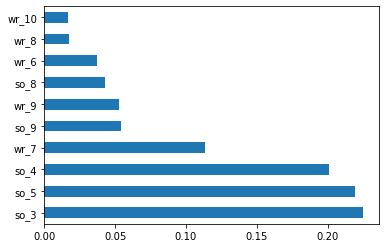

In [10]:
feat_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(top_n_features).plot(kind='barh')
plt.show()

In [11]:
top_feats = list(feat_importances.nlargest(top_n_features).index)
df2 = df[top_feats]

#### Top N Features

In [12]:
# Train and Test samples
train_size = int(len(df2) * 0.7)
X_train, X_test = df2[:train_size], df2[train_size:]
y_train, y_test = target[:train_size], target[train_size:]

rf_model = RandomForestClassifier(n_estimators=20, max_depth=2, random_state=0)

rf_model.fit(X_train, y_train)

print("RandomForest accuracy : ",accuracy_score(y_test, rf_model.predict(X_test), normalize = True))

RandomForest accuracy :  0.658203125


In [13]:
rf_pred = rf_model.predict(df2)

## Support Vector Machine Classifier (with RBF kernel)

In [14]:
# Train and Test samples
train_size = int(len(df) * 0.7)
X_train, X_test = df[:train_size], df[train_size:]
y_train, y_test = target[:train_size], target[train_size:]

svm_model = SVC(kernel='rbf',random_state=0, gamma='auto')

svm_model.fit(X_train, y_train)

print("RBF-SVC accuracy : ",accuracy_score(y_test, svm_model.predict(X_test), normalize = True))

RBF-SVC accuracy :  0.5240885416666666


In [15]:
svm_pred = svm_model.predict(df)

## XGBoost

#### All Features

In [16]:
# Train and Test samples
train_size = int(len(df) * 0.7)
X_train, X_test = df[:train_size], df[train_size:]
y_train, y_test = target[:train_size], target[train_size:]

boost_model = XGBClassifier()

boost_model.fit(X_train, y_train)

print("XGBoost accuracy : ",accuracy_score(y_test, boost_model.predict(X_test), normalize = True))

XGBoost accuracy :  0.6295572916666666


#### Features Selection

In [17]:
top_n_features = 10

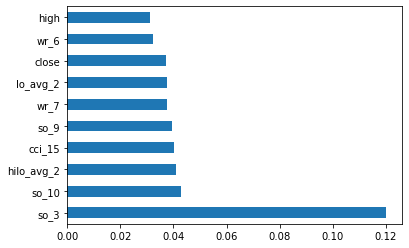

In [18]:
feat_importances = pd.Series(boost_model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(top_n_features).plot(kind='barh')
plt.show()

In [19]:
top_feats = list(feat_importances.nlargest(top_n_features).index)
df2 = df[top_feats]

#### Top N Features

In [20]:
# Train and Test samples
train_size = int(len(df2) * 0.7)
X_train, X_test = df2[:train_size], df2[train_size:]
y_train, y_test = target[:train_size], target[train_size:]

boost_model = XGBClassifier()

boost_model.fit(X_train, y_train)

print("XGBoost accuracy : ",accuracy_score(y_test, boost_model.predict(X_test), normalize = True))

XGBoost accuracy :  0.630859375


In [21]:
boost_pred = boost_model.predict(df2)

## Logistic Regression to form meta classifier

In [31]:
dataset = pd.DataFrame({'RandomForest':rf_pred, 
                        #'SVM':svm_pred, 
                        'XGBoost':boost_pred}, 
                       columns=['RandomForest', 'XGBoost'])
dataset.head(n=5)

,RandomForest,XGBoost
0,0.0,0.0
1,0.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,0.0


In [32]:
# Train and Test samples
train_size = int(len(dataset) * 0.7)
X_train, X_test = dataset[:train_size], dataset[train_size:]
y_train, y_test = target[:train_size], target[train_size:]

regressor = LogisticRegression(solver='lbfgs')

regressor.fit(X_train, y_train)

print("Logistic Regression accuracy : ",accuracy_score(y_test, regressor.predict(X_test), normalize = True))

Logistic Regression accuracy :  0.630859375


In [34]:
# Note how the accuracy is exactly the same as the XGBoost accuracy, this means that the model is simply spitting out the XGBoost model predictions, as confirmed by the .coef_

In [33]:
regressor.coef_

array([[-0.5510631,  7.3420807]])